# Analysis of Mouse Brain Spatial Data

In [2]:
import stt as st
import scanpy as sc
import anndata
import scvelo as scv
import numpy as np
import pandas as pd

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


The processed data could be download [here](https://drive.google.com/file/d/1c53v1xo0wPd_2O7Zkfz1SWYsrv6e5bUC/view?usp=drive_link)

In [3]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mouse_brain.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 4628 × 117
    obs: 'n_counts', 'Region', 'Subclass', 'leiden', 'velocity_self_transition'
    var: 'GeneName', 'mean', 'std', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_xy_loc', 'velocity_xy_loc', 'xy_loc'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [4]:
sc.pp.neighbors(adata, use_rep = 'xy_loc',key_added ='spatial')

In [11]:
sc.tl.leiden(adata,resolution = 0.3)

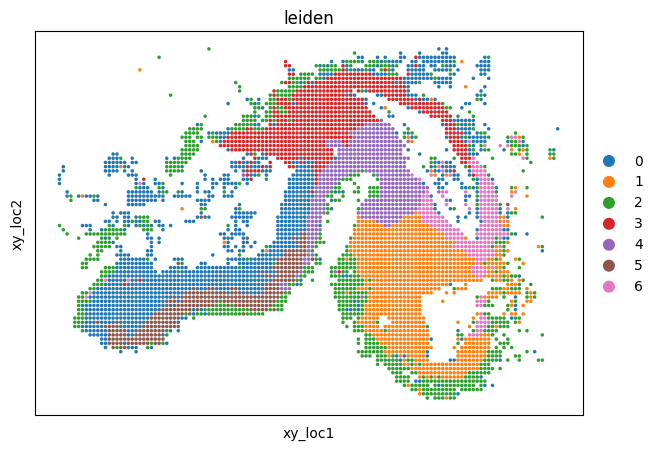

In [12]:
sc.pl.scatter(adata, basis='xy_loc', color='leiden')

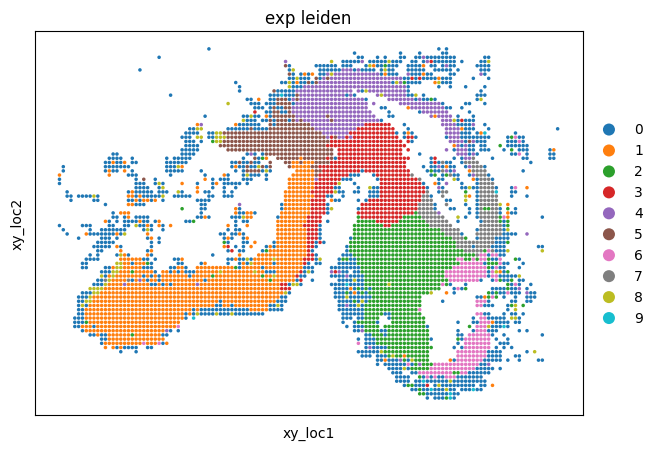

In [17]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata,resolution = 0.3,key_added = 'exp_leiden')
sc.pl.scatter(adata, basis='xy_loc', color='exp_leiden')

In [13]:
adata.obs['leiden'].value_counts()

0    1262
1     898
2     862
3     636
4     434
5     292
6     244
Name: leiden, dtype: int64

In [14]:
U = adata.layers['unspliced']
S = adata.layers['spliced']
if 'toarray' in dir(U):
    U = U.toarray()
    S = S.toarray()
X_all = np.concatenate((U,S),axis = 1)
adata_aggr = anndata.AnnData(X=X_all)
sc.tl.pca(adata_aggr, svd_solver='arpack')
sc.pp.neighbors(adata_aggr)

In [15]:
sc.tl.leiden(adata_aggr,resolution = 0.15)
adata.obs['joint_leiden'] = adata_aggr.obs['leiden'].values

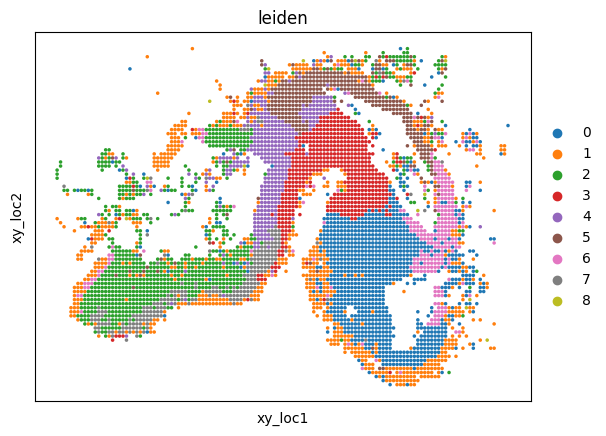

In [16]:
adata_aggr.obsm['xy_loc'] = adata.obsm['xy_loc']
sc.pl.embedding(adata_aggr, basis='xy_loc', color='leiden')

In [11]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.939210
0.25    1.590222
0.50    1.751421
0.75    1.856827
1.00    2.057926
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000016
0.25    0.015841
0.50    0.035881
0.75    0.073217
1.00    0.418025
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000029
0.25    0.028484
0.50    0.063786
0.75    0.118963
1.00    0.500622
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


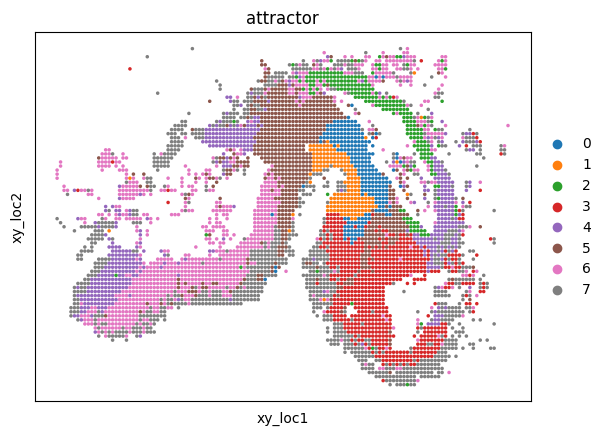

In [26]:
sc.pl.embedding(adata, basis="xy_loc", color=["attractor"])

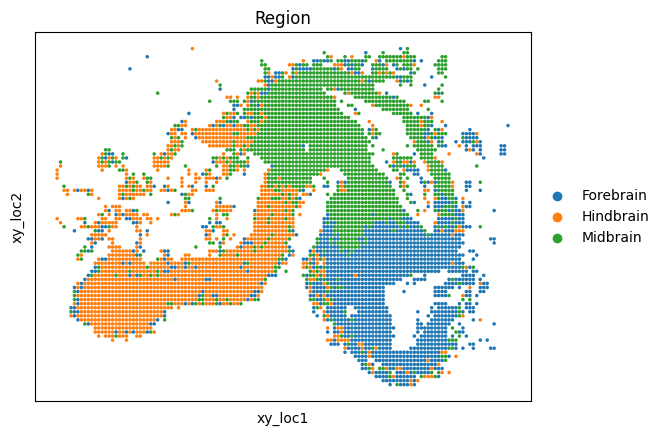

In [27]:
sc.pl.embedding(adata, basis="xy_loc", color=["Region"])

In [13]:
st.tl.compute_pathway(adata,adata_aggr,'KEGG_2019_Mouse')

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)


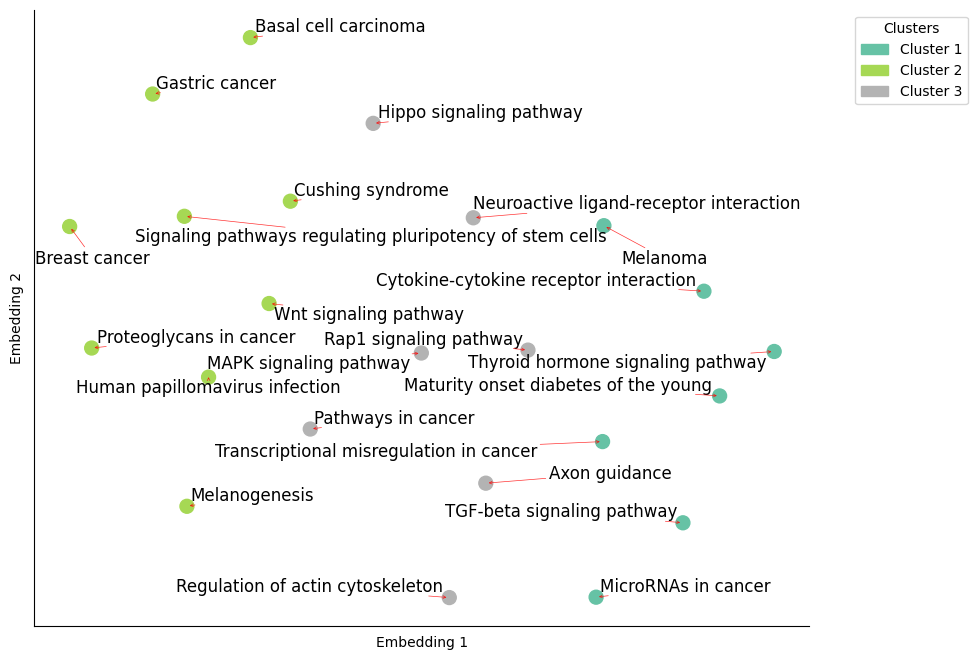

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


In [17]:
fig = st.pl.plot_pathway(adata,figsize = (10,8),size = 100,fontsize = 12)
for ax in fig.axes:
    ax.set_xlabel('Embedding 1', fontsize=20)  # Adjust font size as needed
    ax.set_ylabel('Embedding 2', fontsize=20)  # Adjust font size as needed
fig.show()

In [32]:
#del adata.uns['r2_keep_train']
#del adata.uns['r2_keep_test']
#del adata.uns['kernel']
#del adata.uns['kernel_connectivities']

adata.write_h5ad(data_dir+'mousebrain_hybiss_results.h5ad')
adata_aggr.write_h5ad(data_dir+'mousebrain_hybiss_results_aggr.h5ad')

In [ ]:
fig.savefig('pathway_embedding.png', bbox_inches='tight') 

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


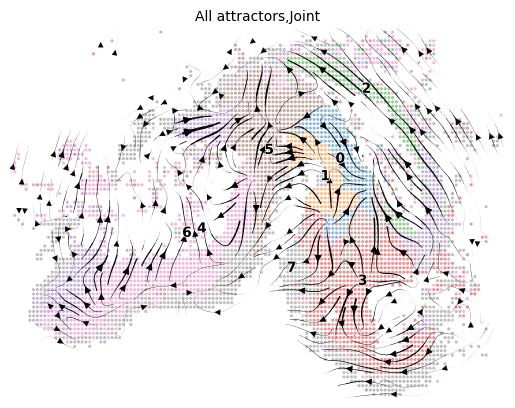

In [23]:
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
st.pl.plot_tensor_pathway(adata,adata_aggr, pathway_name = 'Wnt signaling pathway',basis = 'xy_loc')

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


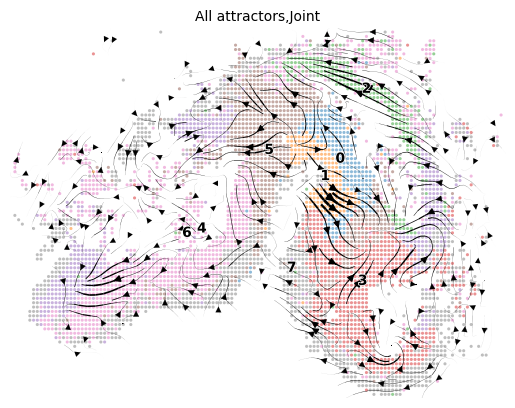

In [24]:
st.pl.plot_tensor_pathway(adata,adata_aggr, 'TGF-beta signaling pathway',basis = 'xy_loc')

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


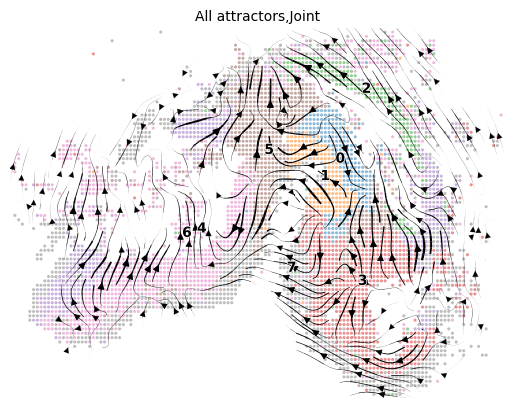

In [25]:
st.pl.plot_tensor_pathway(adata,adata_aggr, 'Hippo signaling pathway',basis = 'xy_loc')

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


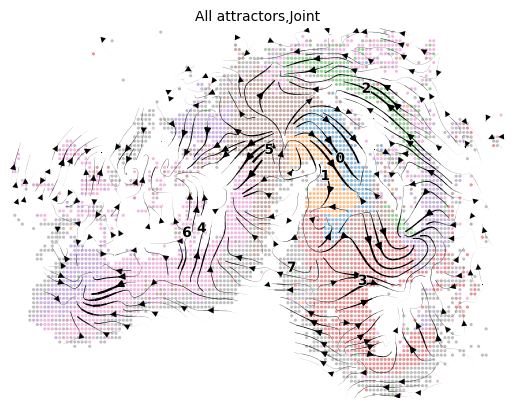

In [30]:
st.pl.plot_tensor_pathway(adata,adata_aggr, 'Thyroid hormone signaling pathway',basis = 'xy_loc')

## Sensitivity Analysis

## Sensitivity of spatial weights


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.976515
0.25    1.485329
0.50    1.644919
0.75    1.750484
1.00    1.994677
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000005
0.25    0.018374
0.50    0.042561
0.75    0.088674
1.00    0.603428
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000007
0.25    0.031415
0.50    0.070233
0.75    0.134359
1.00    0.812149
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.779792
0.25    1.396435
0.50    1.525685
0.75    1.663577
1.00    2.021159
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    6.055422e-07
0.25    6.196054e-02
0.50    1.069045e-01
0.75    1.586357e-01
1.00    4.138116e-01
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000001
0.25    0.097867
0.50    0.162491
0.75    0.226611
1.00    0.545836
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000002
0.25    0.019853
0.50    0.043912
0.75    0.079485
1.00    0.151519
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000003
0.25    0.033841
0.50    0.074154
0.75    0.132521
1.00    0.227007
dtype: float64
Entropy difference is belo

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.904350
0.25    1.395901
0.50    1.515037
0.75    1.655508
1.00    2.021968
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000049
0.25    0.023747
0.50    0.055277
0.75    0.091903
1.00    0.539957
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000081
0.25    0.036541
0.50    0.084868
0.75    0.144761
1.00    0.580187
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.618950
0.25    1.573679
0.50    1.720852
0.75    1.799801
1.00    2.000060
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000002
0.25    0.013775
0.50    0.038455
0.75    0.075364
1.00    1.539184
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000002
0.25    0.023792
0.50    0.065933
0.75    0.124442
1.00    0.952678
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    1.116675
0.25    1.628003
0.50    1.734506
0.75    1.806079
1.00    1.973736
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000022
0.25    0.021295
0.50    0.045425
0.75    0.083256
1.00    0.350428
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000041
0.25    0.036708
0.50    0.076715
0.75    0.142390
1.00    0.412730
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


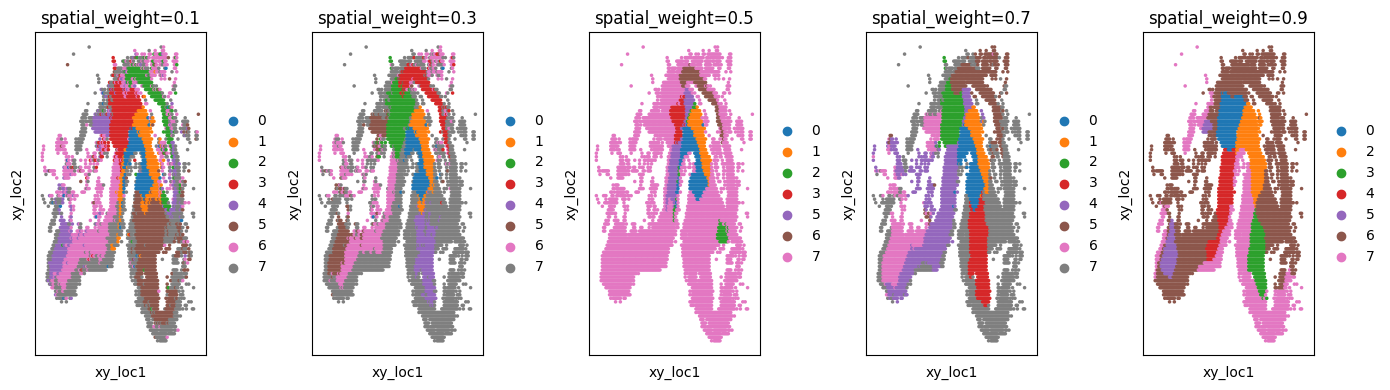

In [9]:
import matplotlib.pyplot as plt
adata.obs['attractor'] = adata.obs['Region']
sc.pp.neighbors(adata, use_rep = 'xy_loc',key_added ='spatial')
nrows =1
weights = [0.1,0.3,0.5,0.7,0.9]
ncols = len(weights)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4))

for i,sw in enumerate(weights):
#adata.obsm['X_umap'] = adata_aggr.obsm['X_umap']
    adata_aggr = st.tl.dynamical_iteration(adata,n_states =8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 100,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = sw, thresh_entropy = 0.1)    
    ax = axes[i]
    sc.pl.embedding(adata, basis="xy_loc", color="attractor",show = False, ax = ax)
    ax.set_title('spatial_weight='+str(sw))
plt.tight_layout()
plt.show()

                            

## Sensitivity on Initial Condition

In [19]:
adata.obs['spa_leiden']=adata.obs['leiden']


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.707419
0.25    1.592140
0.50    1.736723
0.75    1.833012
1.00    2.036678
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    4.560481e-07
0.25    1.392233e-02
0.50    3.171585e-02
0.75    6.422655e-02
1.00    4.168595e-01
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    8.479664e-07
0.25    2.465827e-02
0.50    5.461244e-02
0.75    1.060099e-01
1.00    4.453390e-01
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.754405
0.25    1.553035
0.50    1.686411
0.75    1.780262
1.00    2.037449
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000006
0.25    0.016498
0.50    0.032916
0.75    0.061509
1.00    0.321560
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000011
0.25    0.027451
0.50    0.055098
0.75    0.100057
1.00    0.568465
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    1.121336
0.25    1.510206
0.50    1.608220
0.75    1.685440
1.00    1.836666
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000015
0.25    0.027699
0.50    0.063526
0.75    0.104066
1.00    0.681327
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000023
0.25    0.043965
0.50    0.100505
0.75    0.165744
1.00    1.004082
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000057
0.25    0.025536
0.50    0.056314
0.75    0.116339
1.00    1.488830
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000086
0.25    0.043052
0.50    0.091571
0.75    0.173658
1.00    0.699204
dtype: float64

Quantiles for entropy relative difference wit

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    1.023981
0.25    1.494860
0.50    1.619229
0.75    1.704546
1.00    1.949280
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000021
0.25    0.025540
0.50    0.052742
0.75    0.096600
1.00    0.541225
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000033
0.25    0.041333
0.50    0.086142
0.75    0.152031
1.00    0.614174
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


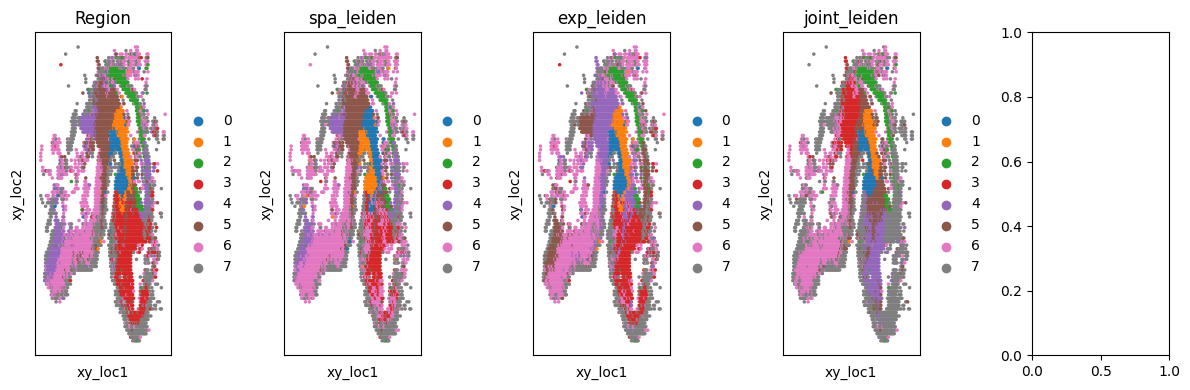

In [21]:
init_key = ['Region','spa_leiden','exp_leiden','joint_leiden']
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4))
for i,key in enumerate(init_key):
    adata.obs['attractor'] = adata.obs[key]
    adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
    ax = axes[i]
    sc.pl.embedding(adata, basis="xy_loc", color="attractor",show = False, ax = ax)
    ax.set_title(key)
plt.tight_layout()
plt.show()

## Sensitivity on MS filter


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.707419
0.25    1.592140
0.50    1.736723
0.75    1.833012
1.00    2.036678
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    4.560481e-07
0.25    1.392233e-02
0.50    3.171585e-02
0.75    6.422655e-02
1.00    4.168595e-01
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    8.479664e-07
0.25    2.465827e-02
0.50    5.461244e-02
0.75    1.060099e-01
1.00    4.453390e-01
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


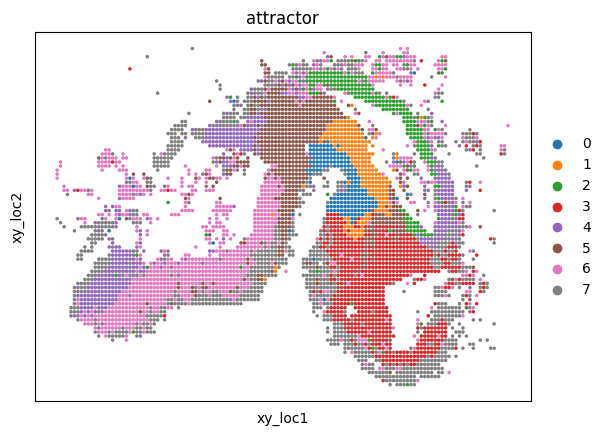

AnnData object with n_obs × n_vars = 4628 × 190
    obs: 'entropy', 'attractor', 'speed'
    var: 'highly_variable'
    uns: 'pca', 'neighbors', 'T_fwd_params', 'eig_fwd', 'gene_subset'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'velocity', 'spliced', 'Ms', 'vj'
    obsp: 'distances', 'connectivities', 'T_fwd'

In [38]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")
adata_aggr

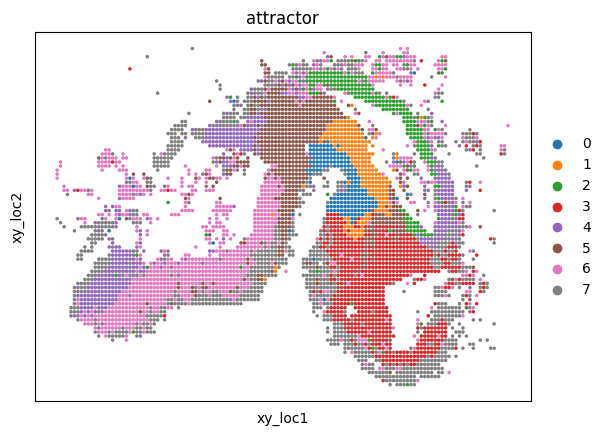

In [23]:
sc.pl.embedding(adata, basis="xy_loc", color="attractor")

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)


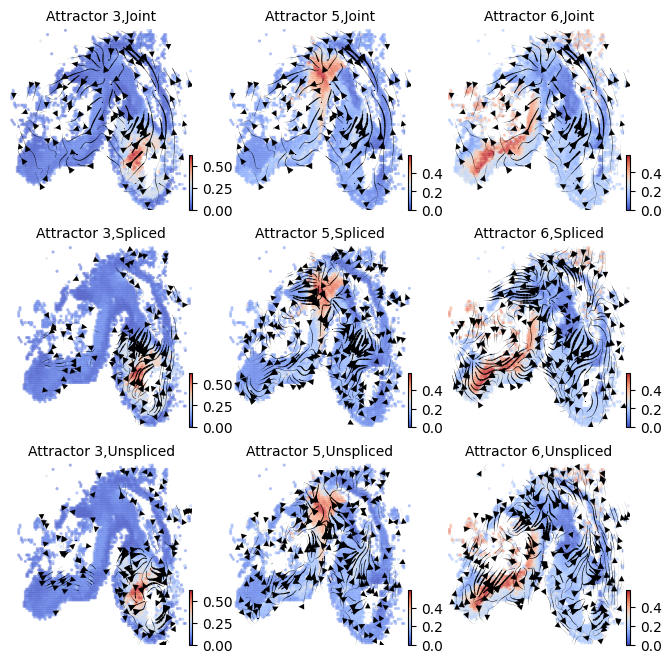

In [30]:
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
st.pl.plot_tensor(adata, adata_aggr, list_attractor = [3,5,6],basis = 'xy_loc',filter_cells = True, member_thresh = 0.1, density = 1)



Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.955970
0.25    1.422127
0.50    1.576479
0.75    1.680257
1.00    1.996338
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000062
0.25    0.072770
0.50    0.133493
0.75    0.182753
1.00    0.721154
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000097
0.25    0.116587
0.50    0.210173
0.75    0.277390
1.00    0.777133
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000013
0.25    0.015185
0.50    0.026500
0.75    0.041206
1.00    0.286581
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000025
0.25    0.025176
0.50    0.046087
0.75    0.070496
1.00    0.420137
dtype: float64
Entropy difference is below the threshold, exi

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


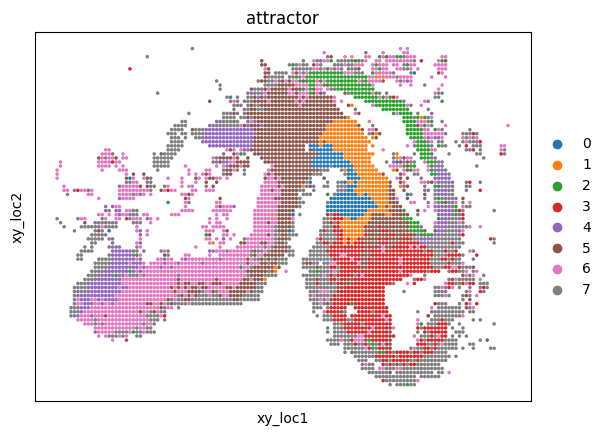

In [32]:
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.3, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:05) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)


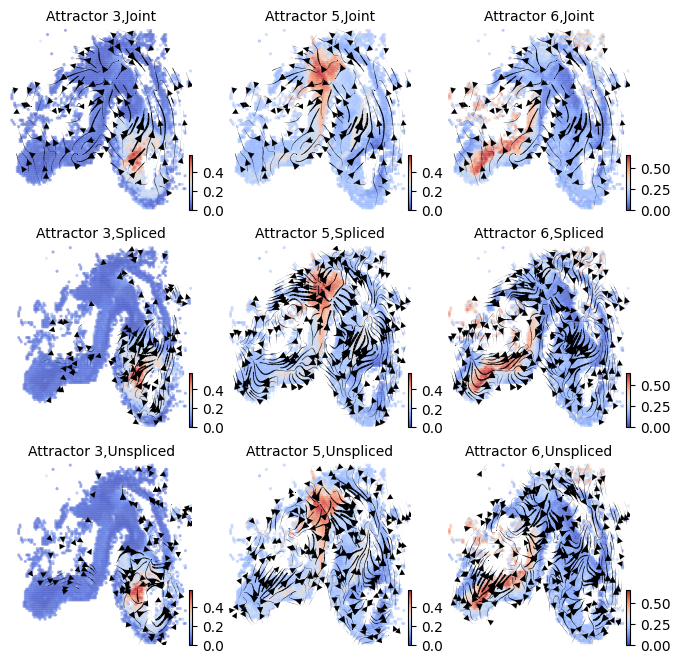

In [35]:
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
st.pl.plot_tensor(adata, adata_aggr, list_attractor = [3,5,6],basis = 'xy_loc',filter_cells = True, member_thresh = 0.1, density = 1)


In [34]:
adata_aggr

AnnData object with n_obs × n_vars = 4628 × 180
    obs: 'entropy', 'attractor', 'speed'
    var: 'highly_variable'
    uns: 'pca', 'neighbors', 'T_fwd_params', 'eig_fwd', 'gene_subset'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'velocity', 'spliced', 'Ms', 'vj'
    obsp: 'distances', 'connectivities', 'T_fwd'


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.704903
0.25    1.357474
0.50    1.569818
0.75    1.699916
1.00    1.984435
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000015
0.25    0.025443
0.50    0.057710
0.75    0.118412
1.00    0.953815
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000027
0.25    0.041452
0.50    0.090456
0.75    0.173087
1.00    0.688549
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000004
0.25    0.016587
0.50    0.034836
0.75    0.072147
1.00    0.250742
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000007
0.25    0.027872
0.50    0.056098
0.75    0.108712
1.00    0.348970
dtype: float64
Entropy difference is below the threshold, exi

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


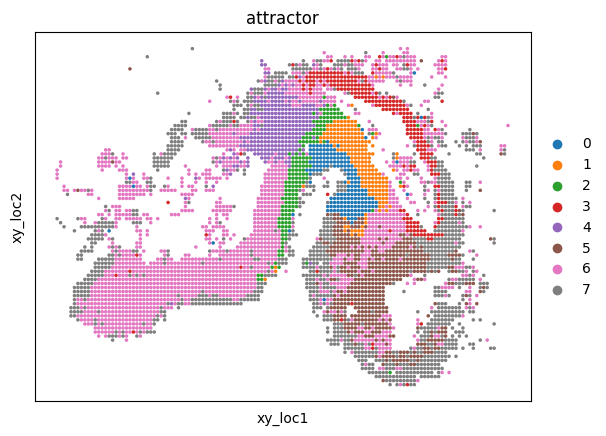

AnnData object with n_obs × n_vars = 4628 × 198
    obs: 'entropy', 'attractor', 'speed'
    var: 'highly_variable'
    uns: 'pca', 'neighbors', 'T_fwd_params', 'eig_fwd', 'gene_subset'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'velocity', 'spliced', 'Ms', 'vj'
    obsp: 'distances', 'connectivities', 'T_fwd'

In [36]:
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.1, spa_weight =0.1, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")
adata_aggr

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vs_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:02) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:05) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vu_xy_loc_aggr', embedded velocity vectors (adata.obsm)


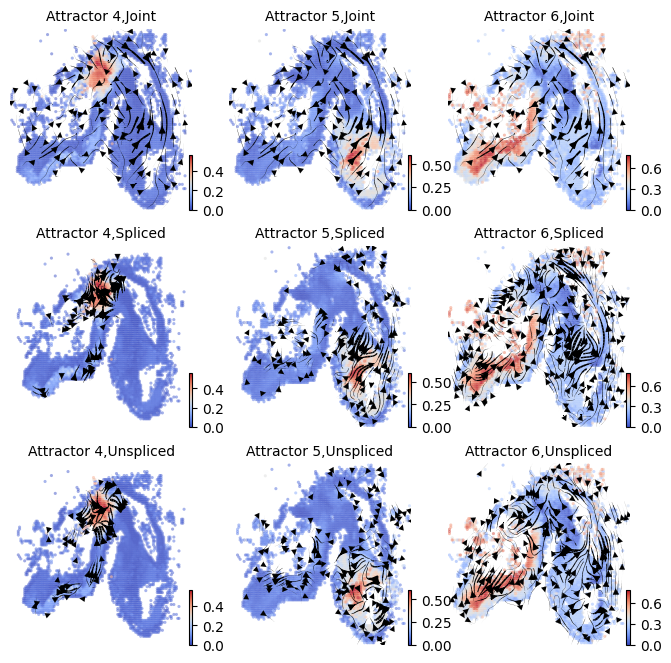

In [37]:
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
st.pl.plot_tensor(adata, adata_aggr, list_attractor = [4,5,6],basis = 'xy_loc',filter_cells = True, member_thresh = 0.1, density = 1)


## Number of attractors

In [ ]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 8, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:08) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


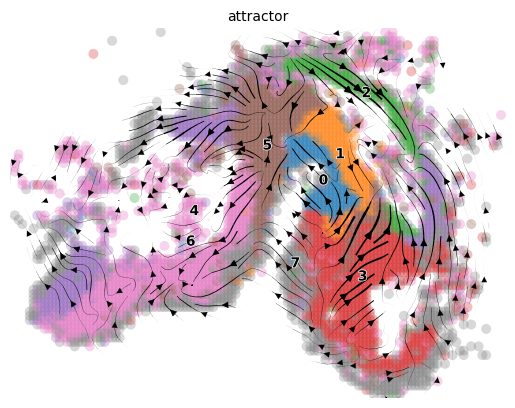

In [39]:
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
scv.tl.velocity_graph(adata_aggr,n_jobs=-1,vkey = 'vj')
scv.pl.velocity_embedding_stream(adata_aggr, basis='xy_loc', color='attractor',vkey = 'vj',density = 2)


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.885537
0.25    1.442221
0.50    1.566187
0.75    1.668831
1.00    1.903257
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000005
0.25    0.030777
0.50    0.075496
0.75    0.152894
1.00    0.773557
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000008
0.25    0.049309
0.50    0.122294
0.75    0.226235
1.00    0.940802
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000013
0.25    0.016746
0.50    0.053168
0.75    0.120219
1.00    2.030360
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000023
0.25    0.027493
0.50    0.092044
0.75    0.198397
1.00    0.637576
dtype: float64

Quantiles for entropy relative difference wit

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


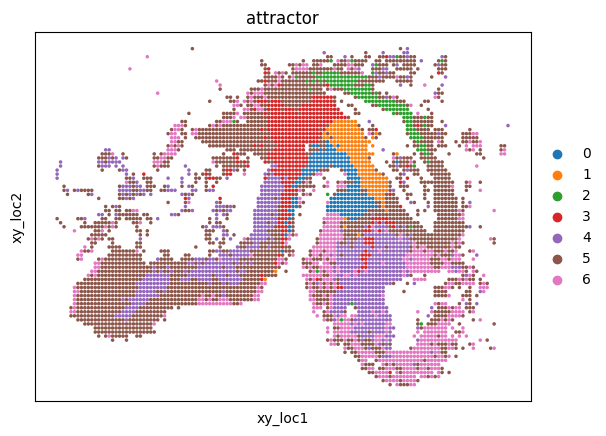

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


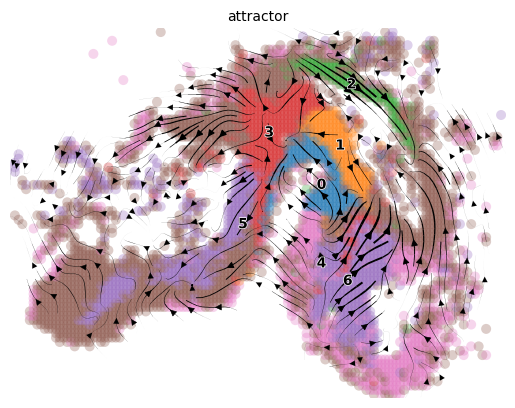

In [40]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 7 , n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
scv.tl.velocity_graph(adata_aggr,n_jobs=-1,vkey = 'vj')
scv.pl.velocity_embedding_stream(adata_aggr, basis='xy_loc', color='attractor',vkey = 'vj',density = 2)


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.766484
0.25    1.716053
0.50    1.862301
0.75    1.943854
1.00    2.131303
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000035
0.25    0.021880
0.50    0.050265
0.75    0.102019
1.00    0.496026
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000071
0.25    0.040295
0.50    0.092311
0.75    0.182309
1.00    0.665812
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000008
0.25    0.021367
0.50    0.039520
0.75    0.067386
1.00    0.262633
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000017
0.25    0.039143
0.50    0.071348
0.75    0.112457
1.00    0.283122
dtype: float64
Entropy difference is below the threshold, exi

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


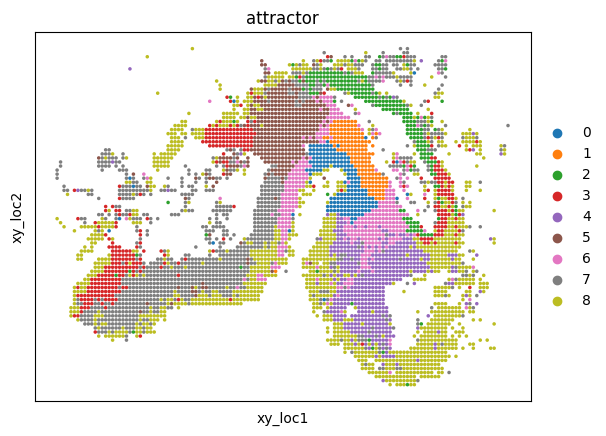

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:07) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


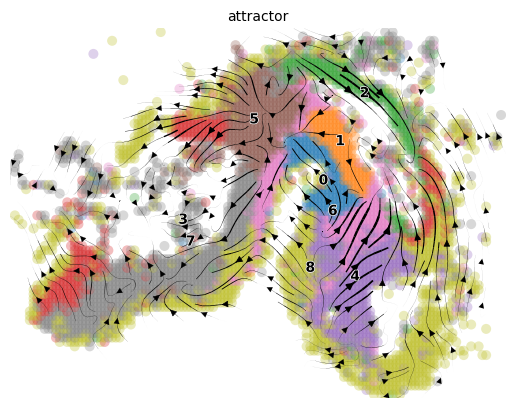

In [41]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 9 , n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
scv.tl.velocity_graph(adata_aggr,n_jobs=-1,vkey = 'vj')
scv.pl.velocity_embedding_stream(adata_aggr, basis='xy_loc', color='attractor',vkey = 'vj',density = 2)


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.885537
0.25    1.442221
0.50    1.566187
0.75    1.668831
1.00    1.903257
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000016
0.25    0.033012
0.50    0.070412
0.75    0.114698
1.00    0.595905
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000025
0.25    0.050394
0.50    0.112255
0.75    0.176970
1.00    0.563518
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000028
0.25    0.029728
0.50    0.054779
0.75    0.098701
1.00    0.409629
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000047
0.25    0.046255
0.50    0.083472
0.75    0.141986
1.00    0.445085
dtype: float64
Entropy difference is below the threshold, exi

/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


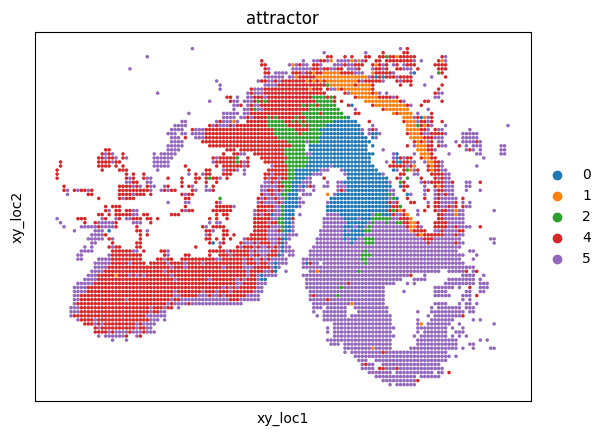

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:06) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'vj_xy_loc', embedded velocity vectors (adata.obsm)


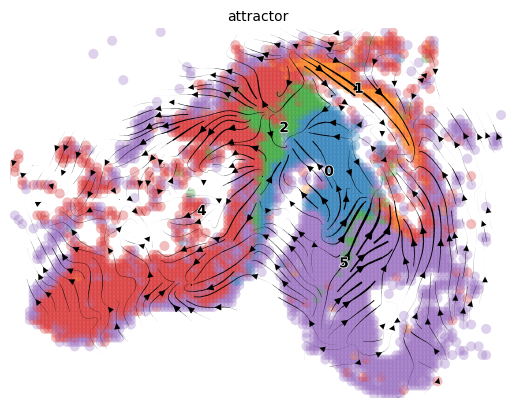

In [42]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 6 , n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.3, thresh_entropy = 0.1)
sc.pl.embedding(adata, basis="xy_loc", color="attractor")
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
scv.tl.velocity_graph(adata_aggr,n_jobs=-1,vkey = 'vj')
scv.pl.velocity_embedding_stream(adata_aggr, basis='xy_loc', color='attractor',vkey = 'vj',density = 2)

## Tensor Visualization

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
mpl.rcParams['axes.grid'] = False
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [0,1,2],filter_cells = True, member_thresh = 0.1)

In [ ]:

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [6,7],filter_cells = True, member_thresh = 0.1)

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 2,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 1,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 1,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 2,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'spliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'unspliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

In [ ]:
st.construct_landscape(adata, coord_key = 'xy_loc')

In [ ]:
sc.set_figure_params(dpi=600,figsize = (6,6) ,fontsize = 10)
st.infer_lineage(adata,si=0,sf=2, method = 'MPPT',flux_fraction=0.6)

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=600,figsize = (4,4) ,fontsize = 10)
st.plot_landscape(adata, dim = 3, elev=57, azim = 167,size_point = 8)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

## Pathway Analysis

In [ ]:
subset = pathway_select['TGF-beta signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.pl.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Wnt signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['MAPK signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Hippo signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')